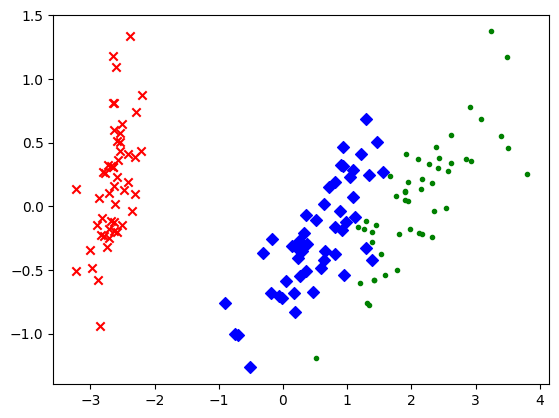

In [1]:
import matplotlib.pyplot as plt
import sklearn.decomposition as dp
from sklearn.datasets import load_iris

x, y = load_iris(return_X_y=True)  #加载数据，x表示数据集中的属性数据，y表示数据标签
pca = dp.PCA(n_components=0.99)  #加载pca算法，设置降维后主成分数目为2
reduced_x = pca.fit_transform(x, y)  #对原始数据进行降维，保存在reduced_x中
red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []
for i in range(len(reduced_x)):  #按鸢尾花的类别将降维后的数据点保存在不同的表表中
    if y[i] == 0:
        red_x.append(reduced_x[i][0])
        red_y.append(reduced_x[i][1])
    elif y[i] == 1:
        blue_x.append(reduced_x[i][0])
        blue_y.append(reduced_x[i][1])
    else:
        green_x.append(reduced_x[i][0])
        green_y.append(reduced_x[i][1])
plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='D')
plt.scatter(green_x, green_y, c='g', marker='.')
plt.show()

In [18]:

import pandas as pd


def pca(X, n_components):
    X = np.array(X)
    X = X - np.mean(X)
    n = len(X)
    A = np.dot(X.T, X) / (n - 1)
    V, D = np.linalg.eig(A)
    idx = (-V).argsort(axis=None)[:n_components]
    P = D[idx]
    F = np.dot(X, P.T)
    return V[idx] / sum(V), F


newdata = pd.read_excel("test.xlsx", sheet_name='Sheet5')
newdata['pH*'] = 1 - abs(newdata['pH*'] - 7)
newdata['CODMn'] = 1 / newdata['CODMn']
newdata['NH3-N'] = 1 / newdata['NH3-N']
newdata['垃圾密度'] = 1 / newdata['垃圾密度']
newdata = newdata.set_index('地点名称').dropna()
newdata = (newdata - newdata.min()) / (newdata.max() - newdata.min())
w, F = pca(newdata, 4)
F @ w.T

array([ 0.02275908,  0.0147325 , -0.20125384,  0.01523191, -0.00662214,
        0.11001344,  0.13257369, -0.05070227, -0.12796354,  0.12495638,
        0.0707507 , -0.1828059 ,  0.01440834,  0.12061112,  0.08173397,
        0.3099708 , -0.0606562 ])

In [2]:
import pandas as pd

data = pd.read_csv("查询数据.csv", encoding='gbk')
data.head()

,指标,乡村人口(万人),女性人口(万人),男性人口(万人),城镇人口(万人),年末总人口(万人),人口出生率(‰),人口死亡率(‰),人口自然增长率(‰),年末总人口(万人).1,...,普通中专生师比(教师人数=1),普通高校生师比(教师人数=1),本科院校生师比(教师人数=1),专科院校生师比(教师人数=1),教育经费(万元),国家财政性教育经费(万元),国家财政预算内教育经费(万元),各类学校教育经费社会捐赠经费(万元),各类学校教育经费学杂费(万元),其他教育经费(万元)
0,2002年,78241,62338,66115,50212,128453,12.86,6.41,6.45,128453,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003年,76851,62671,66556,52376,129227,12.41,6.40,6.01,129227,...,NaN,19.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004年,75705,63012,66976,54283,129988,12.29,6.42,5.87,129988,...,NaN,17.00,NaN,NaN,54800278.0,34914048.0,NaN,1272791.0,9227792.0,2278722.0
3,2005年,74544,63381,67375,56212,130756,12.40,6.51,5.89,130756,...,28.13,16.22,17.44,13.15,62082653.0,38506237.0,NaN,1045927.0,11214985.0,2721943.0
4,2006年,73160,63720,67728,58288,131448,12.09,6.81,5.28,131448,...,31.02,16.85,17.75,14.78,72425989.0,44658575.0,NaN,934204.0,13465517.0,3240414.0


In [3]:
data = data.interpolate('linear')
data = data.fillna(method='bfill')
data

,指标,乡村人口(万人),女性人口(万人),男性人口(万人),城镇人口(万人),年末总人口(万人),人口出生率(‰),人口死亡率(‰),人口自然增长率(‰),年末总人口(万人).1,...,普通中专生师比(教师人数=1),普通高校生师比(教师人数=1),本科院校生师比(教师人数=1),专科院校生师比(教师人数=1),教育经费(万元),国家财政性教育经费(万元),国家财政预算内教育经费(万元),各类学校教育经费社会捐赠经费(万元),各类学校教育经费学杂费(万元),其他教育经费(万元)
0,2002年,78241,62338,66115,50212,128453,12.86,6.41,6.45,128453,...,28.13,19.00,17.44,13.15,54800278.0,34914048.0,31142383.0,1272791.0,9227792.0,2278722.0
1,2003年,76851,62671,66556,52376,129227,12.41,6.40,6.01,129227,...,28.13,19.00,17.44,13.15,54800278.0,34914048.0,31142383.0,1272791.0,9227792.0,2278722.0
2,2004年,75705,63012,66976,54283,129988,12.29,6.42,5.87,129988,...,28.13,17.00,17.44,13.15,54800278.0,34914048.0,31142383.0,1272791.0,9227792.0,2278722.0
3,2005年,74544,63381,67375,56212,130756,12.40,6.51,5.89,130756,...,28.13,16.22,17.44,13.15,62082653.0,38506237.0,31142383.0,1045927.0,11214985.0,2721943.0
4,2006年,73160,63720,67728,58288,131448,12.09,6.81,5.28,131448,...,31.02,16.85,17.75,14.78,72425989.0,44658575.0,31142383.0,934204.0,13465517.0,3240414.0
5,2007年,71496,64081,68048,60633,132129,12.10,6.93,5.17,132129,...,31.67,17.93,17.61,18.26,84188391.0,51610759.0,31142383.0,931613.0,15530545.0,3723842.0
6,2008年,70399,64445,68357,62403,132802,12.14,7.06,5.08,132802,...,31.39,17.28,17.31,17.20,98153087.0,63483648.0,31142383.0,899078.0,15523301.0,4206736.0
7,2009年,68938,64803,68647,64512,133450,11.95,7.08,4.87,133450,...,31.27,17.23,17.21,17.27,121480663.0,82802142.0,31142383.0,930584.0,21309082.0,5166242.0
8,2010年,67113,65343,68748,66978,134091,11.90,7.11,4.79,134091,...,27.82,17.27,17.23,17.35,145007374.0,104496296.0,31142383.0,1026663.0,23492983.0,5115225.0
9,2011年,64989,65755,69161,69927,134916,13.27,7.14,6.13,134916,...,26.10,17.33,17.38,17.21,165027065.0,122310935.0,31142383.0,1254991.0,25155983.0,5435371.0


In [4]:
newdata = data[['小学生师比(教师人数=1)', '初中生师比(教师人数=1)',
                '普通高中生师比(教师人数=1)', '职业高中生师比(教师人数=1)', '普通中专生师比(教师人数=1)',
                '普通高校生师比(教师人数=1)', '本科院校生师比(教师人数=1)', '专科院校生师比(教师人数=1)',
                '教育经费(万元)',
                '国家财政性教育经费(万元)', '国家财政预算内教育经费(万元)', '各类学校教育经费社会捐赠经费(万元)',
                '各类学校教育经费学杂费(万元)']]
newdata['小升初比例'] = data['初中招生数(万人)'] / data['普通小学毕业生数(万人)']
newdata['初升高比例'] = data['普通高中招生数(万人)'] / data['初中毕业生数(万人)']
newdata['职校比例'] = data['职业中学招生数(万人)'] / data['初中毕业生数(万人)']
newdata['升入大学比例'] = data['普通高等学校招生数(万人)'] / (data['普通中学毕业生数(万人)'])
newdata

e:\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
e:\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
e:\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

,小学生师比(教师人数=1),初中生师比(教师人数=1),普通高中生师比(教师人数=1),职业高中生师比(教师人数=1),普通中专生师比(教师人数=1),普通高校生师比(教师人数=1),本科院校生师比(教师人数=1),专科院校生师比(教师人数=1),教育经费(万元),国家财政性教育经费(万元),国家财政预算内教育经费(万元),各类学校教育经费社会捐赠经费(万元),各类学校教育经费学杂费(万元),小升初比例,初升高比例,职校比例,升入大学比例
0,21.04,19.25,17.80,19.10,28.13,19.00,17.44,13.15,54800278.0,34914048.0,31142383.0,1272791.0,9227792.0,0.970194,0.355466,0.113926,0.141587
1,21.04,19.25,17.80,19.10,28.13,19.00,17.44,13.15,54800278.0,34914048.0,31142383.0,1272791.0,9227792.0,0.978923,0.372603,0.110032,0.155765
2,20.50,19.13,18.35,19.10,28.13,17.00,17.44,13.15,54800278.0,34914048.0,31142383.0,1272791.0,9227792.0,0.980985,0.393571,0.109759,0.170895
3,19.98,18.65,18.65,19.10,28.13,16.22,17.44,13.15,62082653.0,38506237.0,31142383.0,1045927.0,11214985.0,0.984204,0.413347,0.122101,0.182256
4,19.43,17.80,18.54,20.62,31.02,16.85,17.75,14.78,72425989.0,44658575.0,31142383.0,934204.0,13465517.0,1.000519,0.420545,0.141919,0.195770
5,19.17,17.15,18.13,22.16,31.67,17.93,17.61,18.26,84188391.0,51610759.0,31142383.0,931613.0,15530545.0,0.999091,0.427866,0.156302,0.206145
6,18.82,16.52,17.48,23.50,31.39,17.28,17.31,17.20,98153087.0,63483648.0,31142383.0,899078.0,15523301.0,0.997105,0.448073,0.157434,0.225161
7,18.38,16.07,16.78,23.47,31.27,17.23,17.21,17.27,121480663.0,82802142.0,31142383.0,930584.0,21309082.0,0.990749,0.461868,0.175354,0.244229
8,17.88,15.47,16.30,23.65,27.82,17.27,17.23,17.35,145007374.0,104496296.0,31142383.0,1026663.0,23492983.0,0.986779,0.477719,0.159828,0.260243
9,17.70,14.98,15.99,23.66,26.10,17.33,17.38,17.21,165027065.0,122310935.0,31142383.0,1254991.0,25155983.0,0.983101,0.489895,0.142308,0.270094


BartlettResult(statistic=4.645690770248118, pvalue=0.7031100332198288)
0.7384021026343464


e:\anaconda\lib\site-packages\sklearn\utils\extmath.py:376: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  FutureWarning,


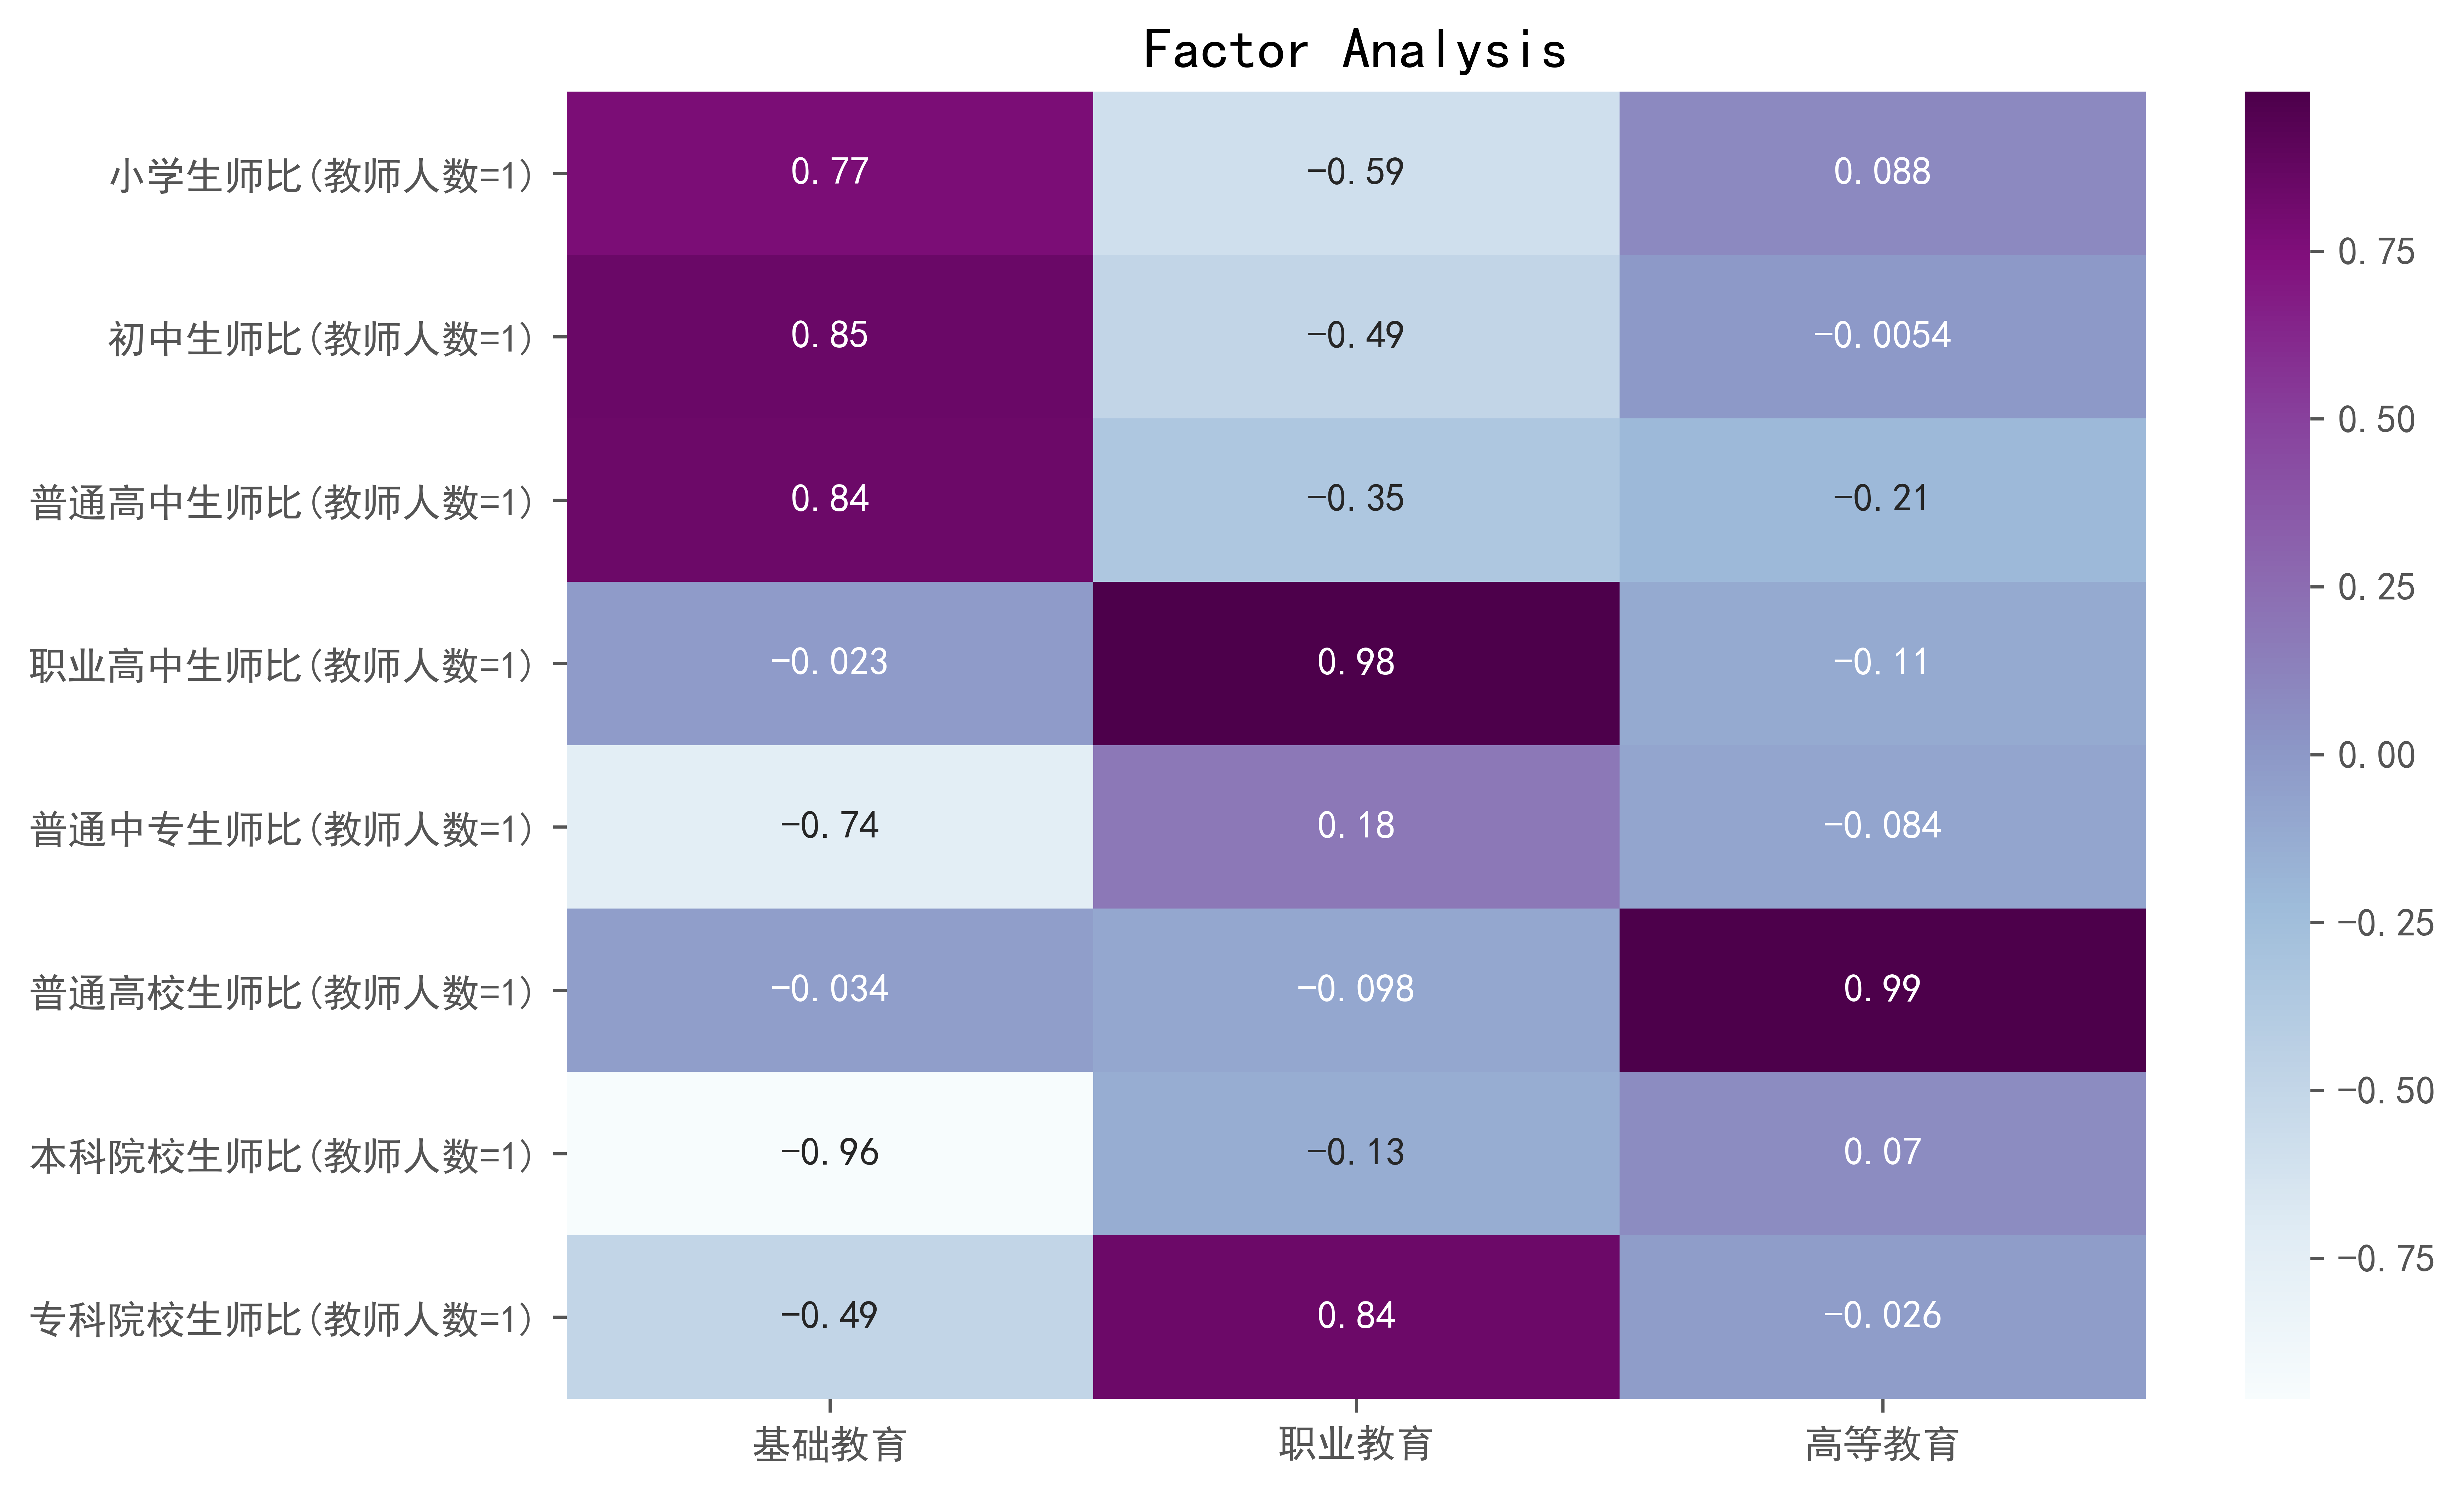

In [5]:
from factor_analyzer import FactorAnalyzer
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import math
from scipy.stats import bartlett

plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号
plt.style.use("ggplot")

n_factors = 3  #因子数量
cols = ['小学生师比(教师人数=1)', '初中生师比(教师人数=1)',
        '普通高中生师比(教师人数=1)', '职业高中生师比(教师人数=1)', '普通中专生师比(教师人数=1)',
        '普通高校生师比(教师人数=1)', '本科院校生师比(教师人数=1)', '专科院校生师比(教师人数=1)']

#用检验是否进行
df = newdata[cols]
corr = list(df.corr().to_numpy())
print(bartlett(*corr))  #巴雷特方法，P>0.05可以做


def kmo(dataset_corr):  #KMO方法
    corr_inv = np.linalg.inv(dataset_corr)  #求逆
    nrow_inv_corr, ncol_inv_corr = dataset_corr.shape
    A = np.ones((nrow_inv_corr, ncol_inv_corr))
    for i in range(nrow_inv_corr):
        for j in range(i, ncol_inv_corr, 1):
            A[i, j] = -(corr_inv[i, j]) / (math.sqrt(corr_inv[i, i] * corr_inv[j, j]))
            A[j, i] = A[i, j]
    dataset_corr = np.asarray(dataset_corr)
    kmo_num = np.sum(np.square(dataset_corr)) - np.sum(np.square(np.diagonal(A)))
    kmo_denom = kmo_num + np.sum(np.square(A)) - np.sum(np.square(np.diagonal(A)))
    kmo_value = kmo_num / kmo_denom
    return kmo_value


print(kmo(newdata[cols].corr().to_numpy()))  #KMO>0.05也表明可以做

#开始计算
fa = FactorAnalyzer(n_factors=n_factors, method='principal', rotation="varimax")
fa.fit(newdata[cols])
communalities = fa.get_communalities()  #共性因子方差
loadings = fa.loadings_  #成分矩阵，可以看出特征的归属因子

#画图
plt.figure(figsize=(9, 6), dpi=800)
ax = sns.heatmap(loadings, annot=True, cmap="BuPu")
ax.set_xticklabels(['基础教育', '职业教育', '高等教育'], rotation=0)
ax.set_yticklabels(cols, rotation=0)
plt.title('Factor Analysis')
plt.show()

factor_variance = fa.get_factor_variance()  #贡献率
fa_score = fa.transform(newdata[cols])  #因子得分

#综合得分
complex_score = np.zeros([fa_score.shape[0], ])
for i in range(n_factors):
    complex_score += fa_score[:, i] * factor_variance[1][i]  #综合得分s

In [8]:
fa_score

array([[ 1.15213840e+00, -1.41969818e+00,  2.13718371e+00],
       [ 1.15213840e+00, -1.41969818e+00,  2.13718371e+00],
       [ 9.34378898e-01, -1.66802736e+00, -9.35979854e-01],
       [ 7.93133110e-01, -1.72445564e+00, -2.15856901e+00],
       [ 1.83100298e-01, -1.11425076e+00, -1.40713980e+00],
       [ 5.83801983e-01,  5.47803531e-01,  3.79949144e-01],
       [ 1.00892116e+00,  1.15003459e+00, -4.68596812e-01],
       [ 9.97134596e-01,  1.32240567e+00, -4.74325993e-01],
       [ 1.33735473e+00,  1.65659572e+00, -1.30833336e-01],
       [ 1.29192206e+00,  1.60723303e+00,  7.44939781e-02],
       [ 2.09170229e-03,  4.30607840e-01, -2.68545787e-01],
       [-7.87463502e-01, -2.94156818e-02, -2.04366364e-01],
       [-9.67084894e-01,  5.71979810e-02, -1.74632967e-01],
       [-1.01755986e+00,  8.81886657e-02,  9.63935268e-02],
       [-1.04198828e+00,  7.92187591e-02,  2.23071354e-01],
       [-1.14217815e+00, -2.15841825e-02, -7.30041694e-01],
       [-1.12817665e+00,  5.78677137e-02